# 03. Merging data and obtaining conclusions




The file contains the code used to combine both datasets, get crossed information, complete the datasets.


Both datasets are compared and analysed.

The functions used are in a file inside the SRC folder, where they are explained.

Clash Royale is a game available to play in mobile phones. There are several cards to be used in the game, the player must choose a deck of 8 cards and use them during the game. The objective is to destroy the opponent's towers while you protect your own towers. There are 2 small towers and a bigger one with your king defending it. If you manage to destroy only one tower you'll get one crown at the end of the game, and if you destroy the King's one you'll get 3 crowns and win the game. For more information you can check the following [video](https://www.youtube.com/watch?v=EVMFgEwdCHc).
Each card has an elixir' cost to be summoned, a number of hitpoints the card resists before disapearing, and a damage it deals.
Here I'm going to make a comparison between the available cards and their stats and the most used decks in the game.

In [8]:
import sys
import seaborn as sns
sys.path.append("../")
from src.set_functions import *

In [9]:
best_decks = pd.read_csv("final_decks_list",encoding = "ISO-8859-1")
cards = pd.read_csv("royale_clean",encoding = "ISO-8859-1")

best_decks = best_decks.drop(columns=['Unnamed: 0'])
cards = cards.drop(columns=['Unnamed: 0'])


In [10]:
cards = obtain_info_from_decks(best_decks, cards)

In [47]:
cards.head(5)

,name,elixir,cardtype,hitpoints14,max_hitpoints_per_elixir,damage14,max_damage_per_elixir,Use,Victory_ratio,Crowns_ratio
0,Skeletons,1,Common,108.0,108.0,324.0,324.0,11,46.34,0.65
1,Ice Spirit,1,Common,305.0,305.0,145.0,145.0,6,45.10,0.62
2,Heal,1,Spell,0.0,0.0,0.0,0.0,0,0.00,0.00
3,Goblins,2,Common,267.0,133.5,477.0,238.5,1,49.12,0.65
4,Spear Goblins,2,Common,176.0,88.0,324.0,162.0,8,53.33,0.85


In [12]:
best_decks = obtain_info_from_card_list(best_decks, cards)

In [17]:
best_decks.head()

,card_1,card_2,card_3,card_4,card_5,card_6,card_7,card_8,victory_ratio,crowns_ratio,cards_in_list,total_elixir,average_elixir,total_hitpoints,total_damage,average_hitpoints,average_damage
0,Skeletons,Musketeer,Hog Rider,Ice Spirit,Ice Golem,Cannon,Fireball,The Log,37.90,0.59,8,21,2.62,7302.0,2262.0,912.75,282.75
1,Knight,Princess,Ice Spirit,Goblin Gang,Inferno Tower,Rocket,Goblin Barrel,The Log,45.73,0.66,8,26,3.25,5829.0,4213.0,728.62,526.62
2,Knight,Spear Goblins,Miner,Bats,Wall Breakers,Bomb Tower,Fireball,The Log,50.02,0.75,8,22,2.75,7243.0,3662.0,905.38,457.75
3,P.E.K.K.A,Battle Ram,Electro Wizard,Bandit,Royal Ghost,Magic Archer,Zap,Poison,56.24,1.03,8,31,3.88,11678.0,3107.0,1459.75,388.38
4,Baby Dragon,Ice Wizard,Dark Prince,Electro Giant,Goblin Cage,Lightning,Tornado,Barbarian Barrel,57.46,0.95,7,0,0.00,0.0,0.0,0.00,0.00


## 3.1. Pairplots

Before starting to check in each table in detail I like to plot a pairplot graph to see if there is a very clear relation among all the columns.

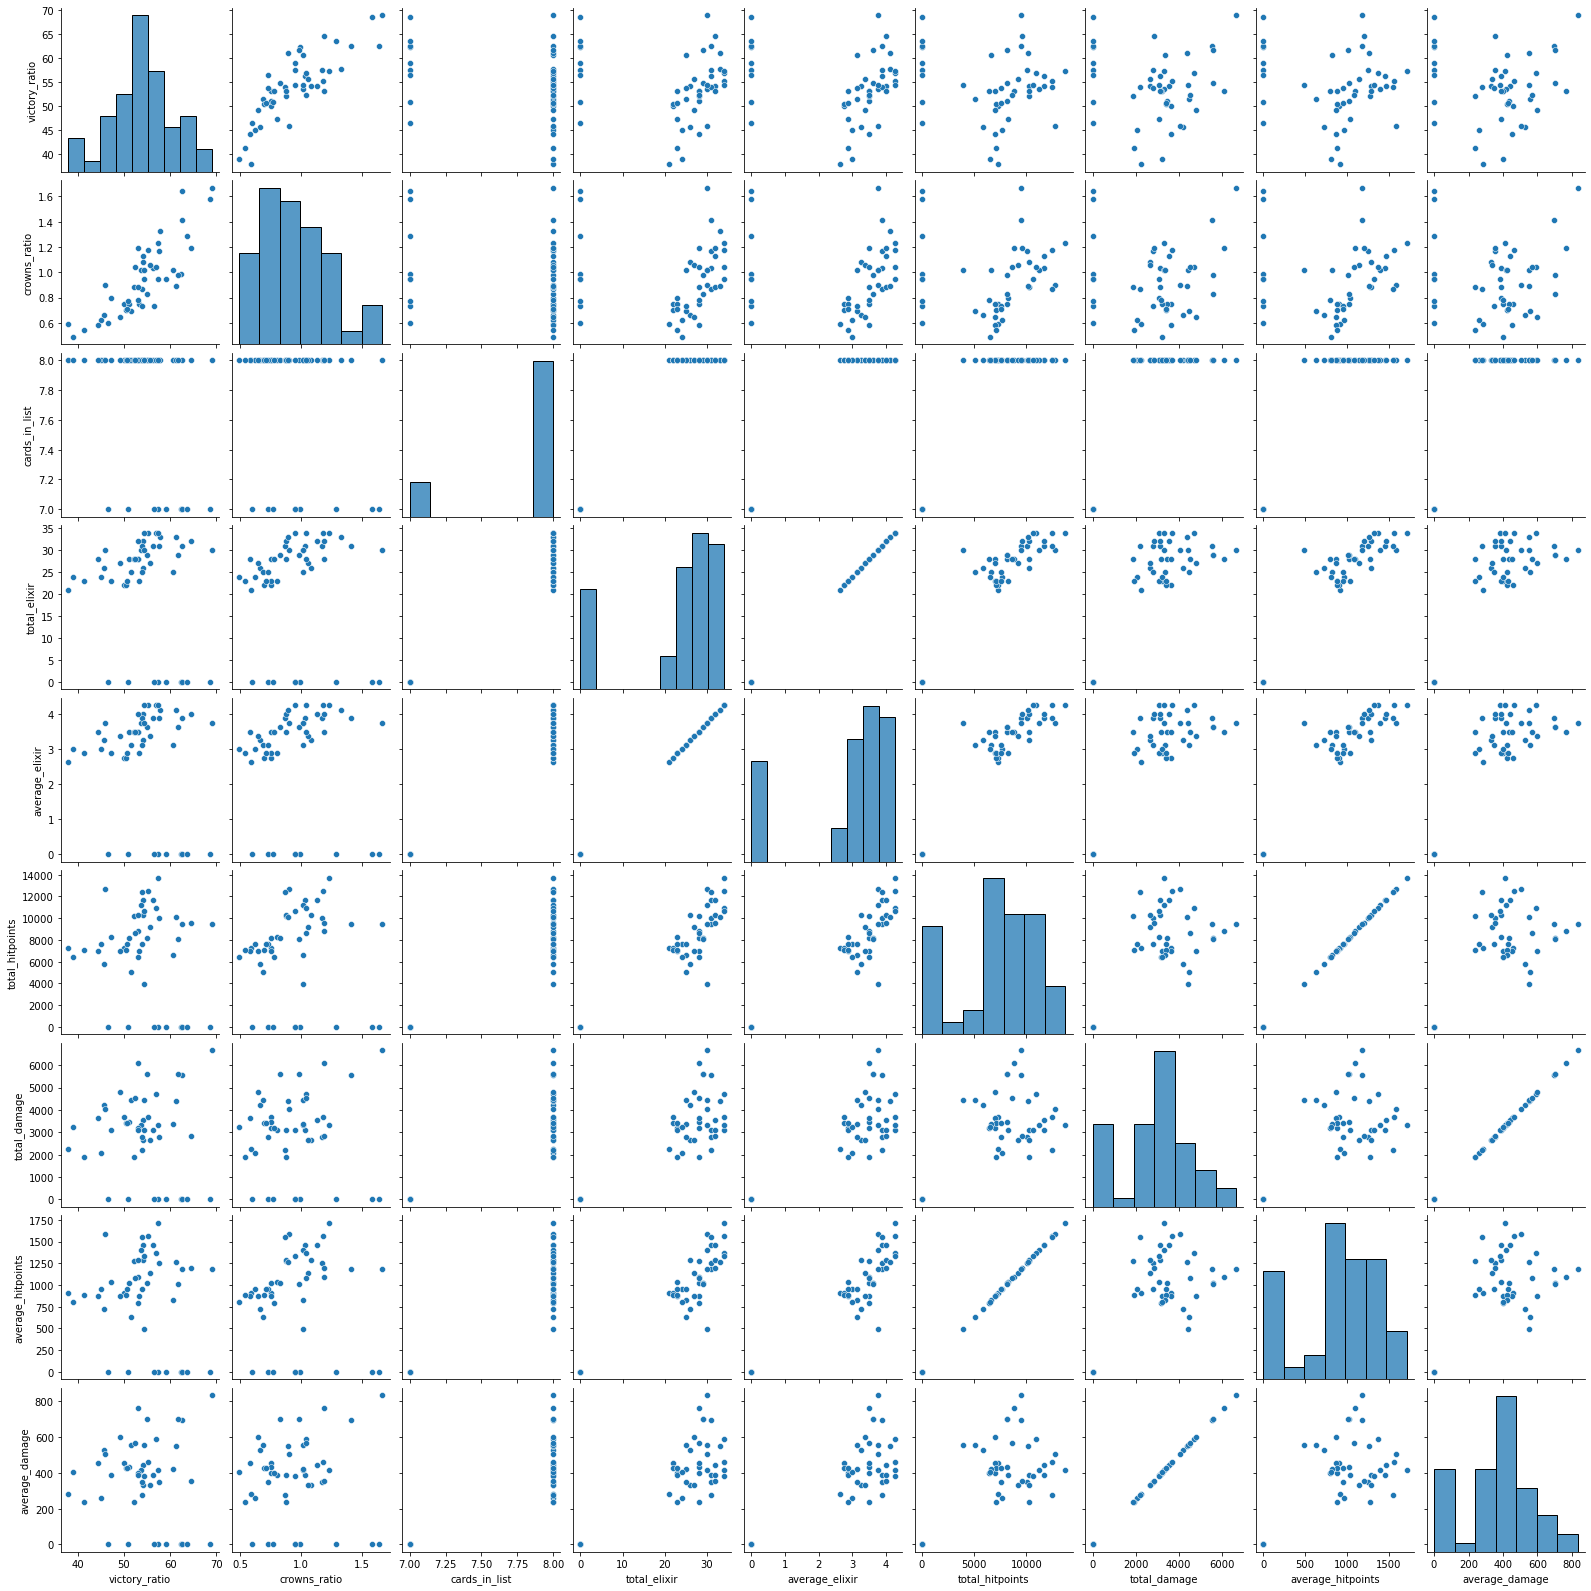

In [14]:
sns.pairplot(best_decks)

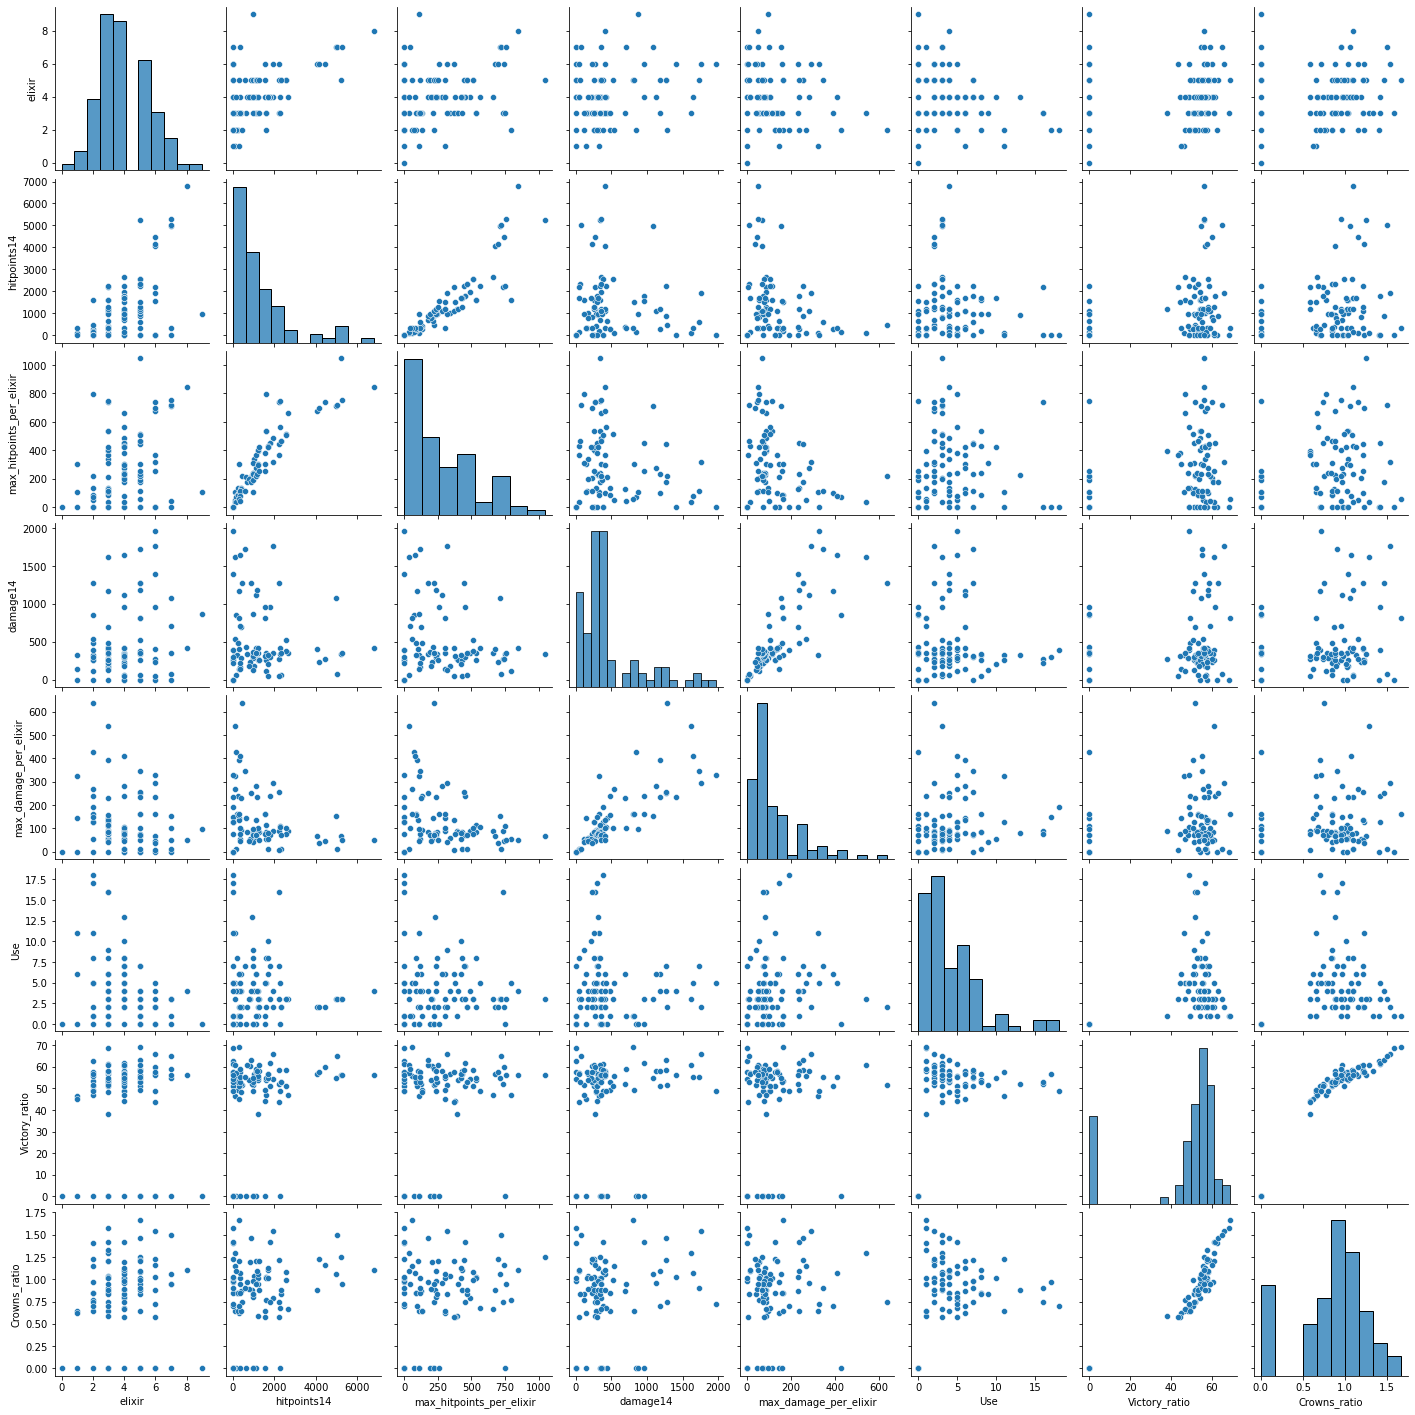

In [15]:
sns.pairplot(cards)

## 3.2. List of cards

The total set of cards available in the game can be sorted in 5 kinds of cards, regarding their difficulty to be found in the game. There are also some spells to enhance the power of the own cards or make damage into the opponent's cards.

<AxesSubplot:xlabel='cardtype', ylabel='count'>

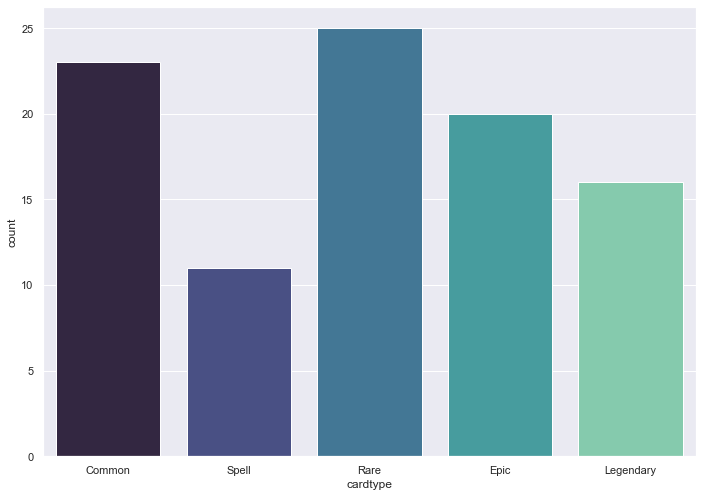

In [43]:
sns.countplot(x = cards["cardtype"], palette="mako")

The first thing I want to know is which are the 10 most used cards in the game, for this I'll do a sub-dataframe with the names and the use and plot a barplot.

In [18]:
sns.set(rc = {'figure.figsize':(11.7,8.27)})

In [30]:
used_cards = cards[["name", "Use"]].sort_values(["Use"], ascending = [False]).head(10)

<AxesSubplot:xlabel='name', ylabel='Use'>

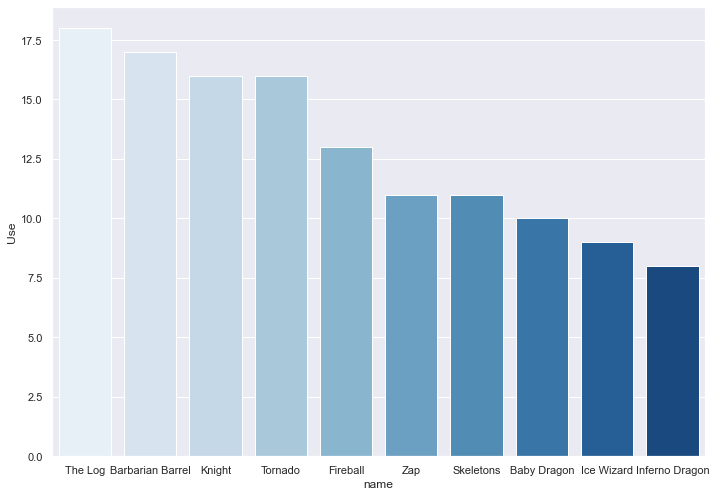

In [32]:
sns.barplot(x = 'name', y = 'Use', data = used_cards, palette = "Blues")

Then, I want to know the cards with a higher victory ratio and higher crown ratio

In [36]:
card_victory = cards[["name", "Victory_ratio"]].sort_values(["Victory_ratio"], ascending=[False]).head(10)

<AxesSubplot:xlabel='name', ylabel='Victory_ratio'>

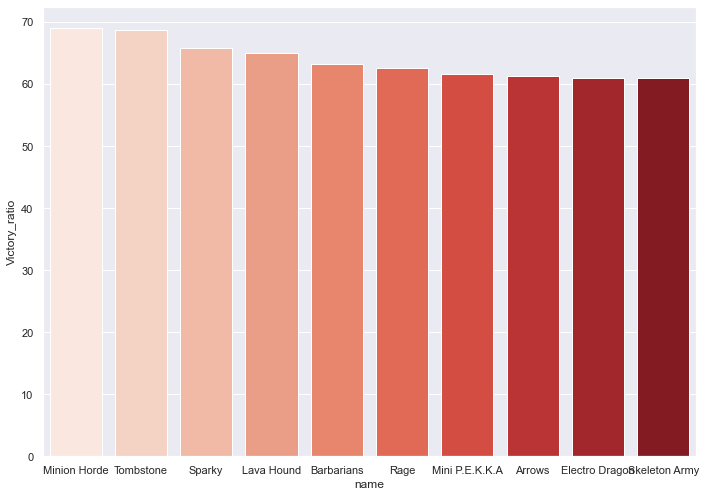

In [39]:
sns.barplot(x = 'name', y = 'Victory_ratio', data = card_victory, palette = "Reds")

Now, the cards with higher crown-ratio

In [40]:
card_crown = cards[["name", "Crowns_ratio"]].sort_values(["Crowns_ratio"], ascending=[False]).head(10)

<AxesSubplot:xlabel='name', ylabel='Crowns_ratio'>

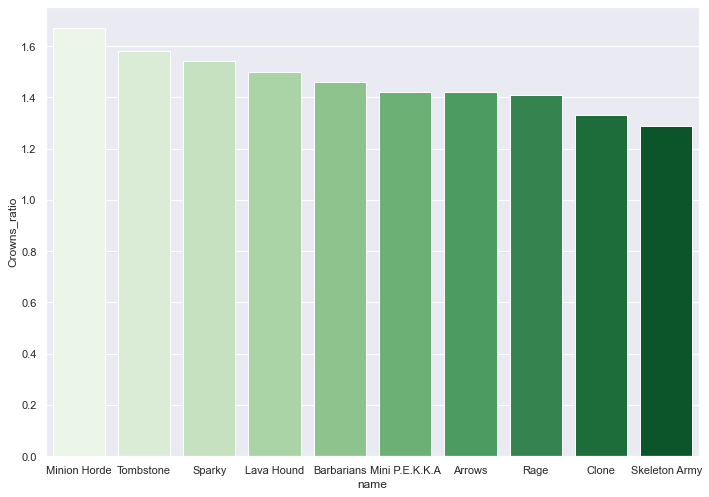

In [41]:
sns.barplot(x = 'name', y = 'Crowns_ratio', data = card_crown, palette = "Greens")

Aparently the Minion Horde is the most effective card, however is not even in the top 10 of most used cards

The most used cards require less elixir to be summonded, as can be observed in the next scatterplot. This kind of cards are cheap to put in game and very usefull.

<AxesSubplot:xlabel='Use', ylabel='elixir'>

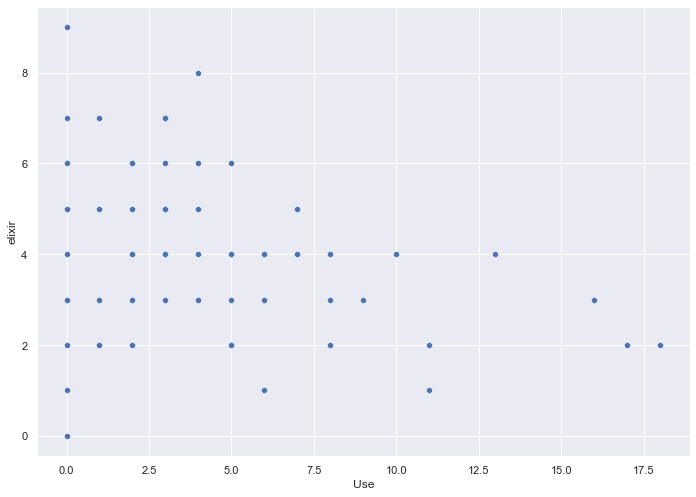

In [56]:
sns.scatterplot(x = "Use", y = "elixir", data = cards)

The relation between unitary hitpoints and damage follows a clear trend, cards with high damage have reduced hitpoints and can be used to attack, and cards with high hitpoints have low damage and can be either used as tanks to protect the attacker cards.

<AxesSubplot:xlabel='max_damage_per_elixir', ylabel='max_hitpoints_per_elixir'>

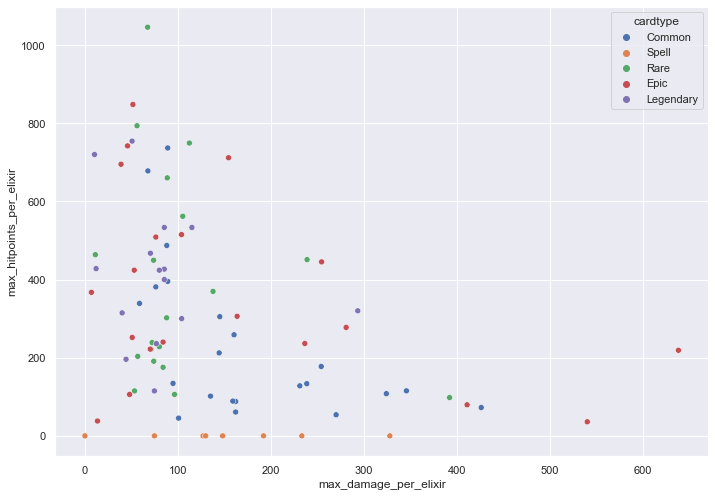

In [57]:
sns.scatterplot(x = "max_damage_per_elixir", y = "max_hitpoints_per_elixir", hue = "cardtype", data = cards)

## 3.3. Most popular decks

After analysing the cards I'm going to analyse the most popular decks.

The first thing to check is to see how the average elixir cost of a deck is related with the victory ratio and the crown ratio.

In [67]:
subset = best_decks[best_decks["average_elixir"] != 0]

<AxesSubplot:xlabel='average_elixir', ylabel='victory_ratio'>

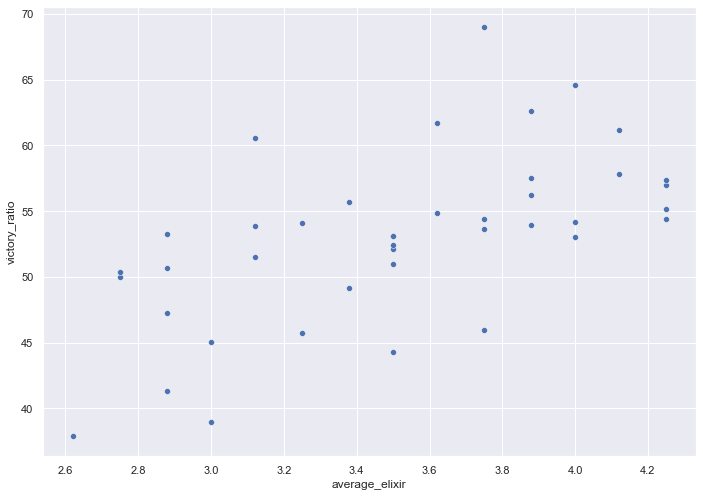

In [70]:
sns.scatterplot(x = "average_elixir", y = "victory_ratio", data = subset)

<AxesSubplot:xlabel='average_elixir', ylabel='crowns_ratio'>

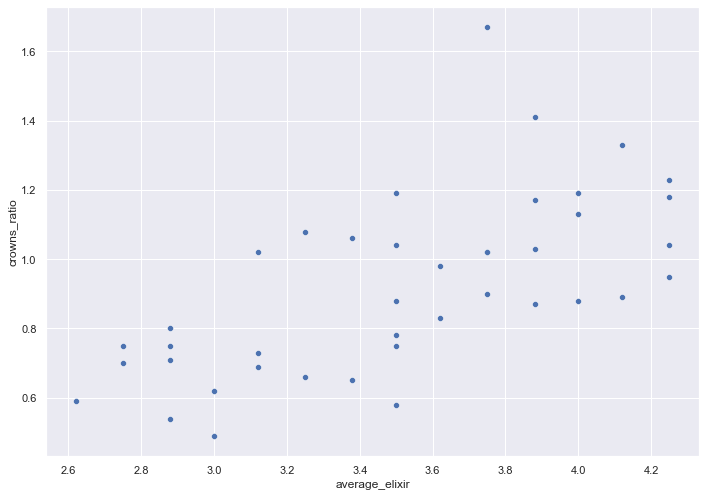

In [72]:
sns.scatterplot(x = "average_elixir", y = "crowns_ratio", data = subset)

In both cases it seems that there is an ascending trend. Stronger cards have a higher elixir cost.
Looks that is better to be patient and wait until you can summon stronger cards to attack.

<AxesSubplot:xlabel='victory_ratio', ylabel='crowns_ratio'>

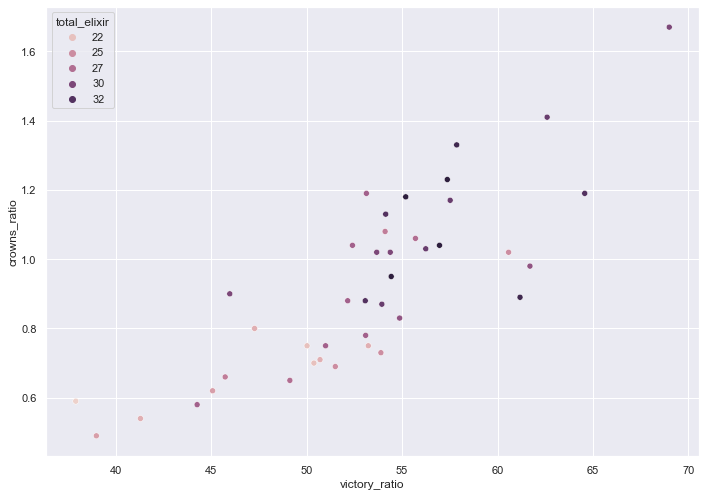

In [88]:
sns.scatterplot(x = "victory_ratio", y = "crowns_ratio", hue = "total_elixir", data = subset)

You can win if you destroy a single enemy tower and then protect your own towers, however, it seems that is much more effective to have an aggressive strategy in the game. The direct relation between crowns and victory ratio indicates that is better to attack instead of having a defensive strategy.

Now we are going to compare the victory ratios with the average hitpoints and damage of the decks.

<AxesSubplot:xlabel='victory_ratio', ylabel='average_hitpoints'>

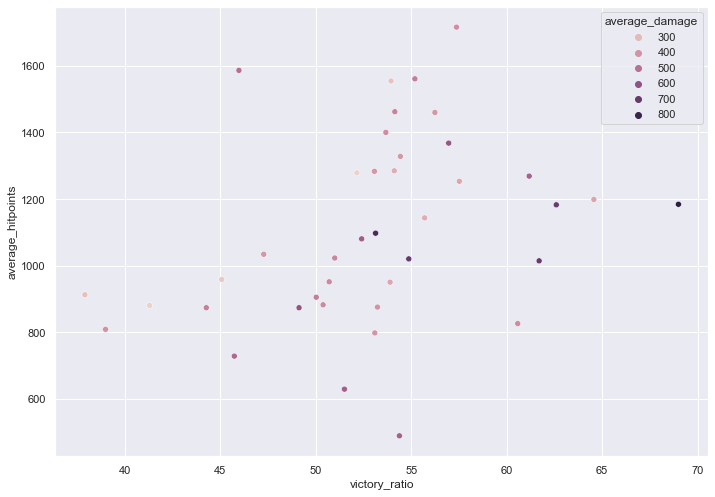

In [79]:
sns.scatterplot(x = "victory_ratio", y = "average_hitpoints", hue = "average_damage", data = subset)

<AxesSubplot:xlabel='victory_ratio', ylabel='average_damage'>

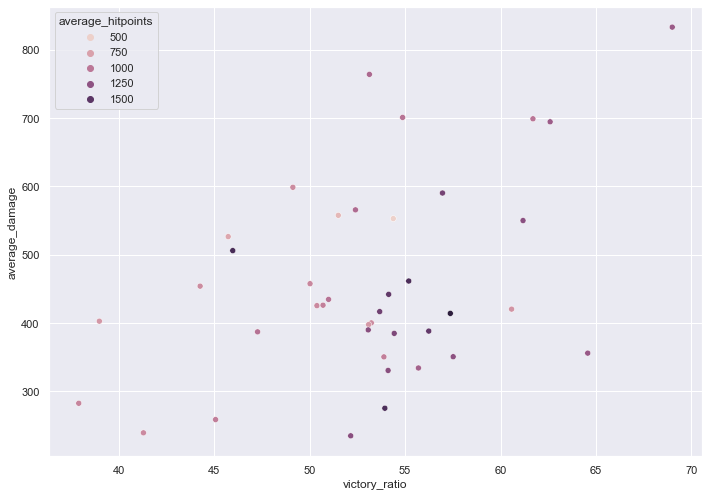

In [80]:
sns.scatterplot(x = "victory_ratio", y = "average_damage", hue = "average_hitpoints", data = subset)

From the first scatterplot we can see that decks with higher victory ratios have an average hitpoint value between 800 and 1200, and decks with higher hitpoint values have smaller victory ratios, so they are not so effective. This indicates again that deffensive strategies are less effective.

On the other hand, from the second scatterplot we can see that the average damage is not so important. The higher average damage coincides with the higher victory ratio, however, there is not a clear trend, and there are some decks with high victory ratio with low average damage. This implies that is not necessary to make one big attack to win, but series of consecutive small attacks are also very effective.

## 3.4. Conclusions


- The most popular cards are "The log", "Barbarian barrel" and the "Knight", however, the most effective in terms of victory ratios and crowns' ratios are the "Minion Horde", "Tombstone" and "Sparky".
- The most used cards have a smaller summon cost.
- The hitpoints of a card have a negative relation with the card damage, in such a wat that some cards are effective defending and others attacking.
- There is a linear relation between effectiveness and average elixir cost. Decks with higher victory and crowns ratio have average elixir costs around 4, and other decks with smaller elixir costs have less victory ratios.
- There is a direct relation between victory ratio and crown ratio. This indicates that is better to have an aggressive strategy instead of a defensive one. 
- Decks with cards with high hitpoints are less effective, again, is better to have an agressive strategy.
- Decks with cards with high damage are not necesary the best. Making a few very strong attacks is as effective as making lots of smaller attacks.